# Hypothesis Testing

## **Z-Test**

In [16]:
import numpy as np
from scipy.stats import norm

# Set the significance level
alpha = 0.05

# Set the null hypothesis mean
null_mean = 12

# Calculate the sample size, mean, and standard deviation
n = 25
sample_mean = 11.8
sample_std = 0.4

# Calculate the Z-score
z = (sample_mean - null_mean) / (sample_std / np.sqrt(n))

# Calculate the p-value
p_value = 2 * (1 - norm.cdf(abs(z)))

# Compare the p-value to the significance level and print the result
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


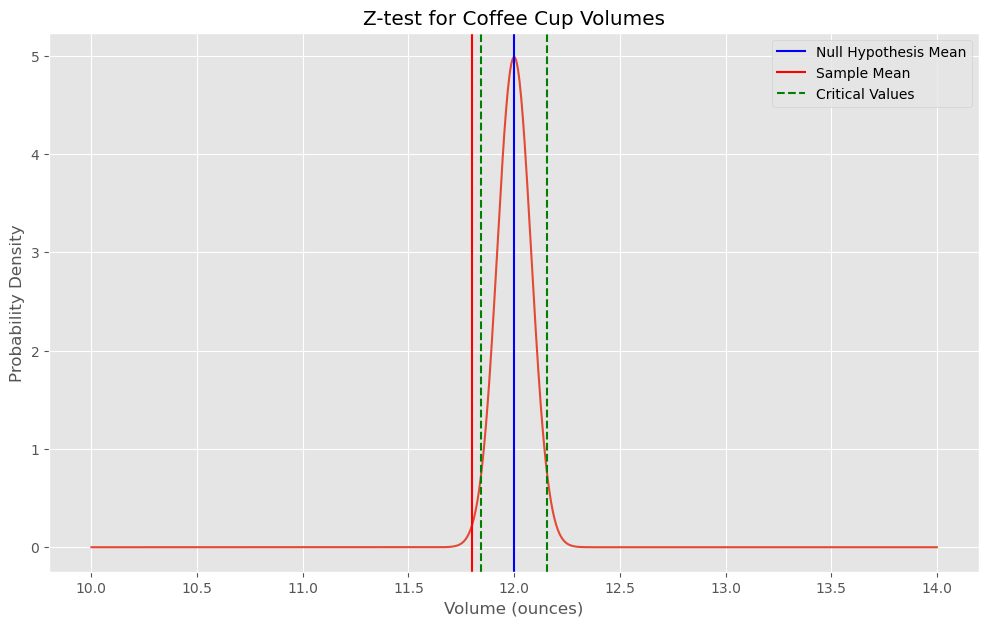

In [17]:
import matplotlib.pyplot as plt

# Set the x-axis limits
x_min = 10
x_max = 14

# Create the x-axis values
x = np.linspace(x_min, x_max, 1000)

# Calculate the y-axis values for the normal distribution
y = norm.pdf(x, null_mean, sample_std / np.sqrt(n))

# Calculate the critical values for the test
z_critical = norm.ppf(alpha / 2)
x_left = null_mean + z_critical * sample_std / np.sqrt(n)
x_right = null_mean - z_critical * sample_std / np.sqrt(n)

# style and size
plt.style.use('ggplot')
plt.figure(figsize=(12,7))

# Plot the normal distribution and the critical values
plt.plot(x, y)
plt.axvline(x=null_mean, color='b', label='Null Hypothesis Mean')
plt.axvline(x=sample_mean, color='r', label='Sample Mean')
plt.axvline(x=x_left, linestyle='--', color='g', label='Critical Values')
plt.axvline(x=x_right, linestyle='--', color='g')
plt.legend()
plt.xlabel('Volume (ounces)')
plt.ylabel('Probability Density')
plt.title('Z-test for Coffee Cup Volumes')
plt.show()

`Z-test` on the tips Dataset

Reject the null hypothesis


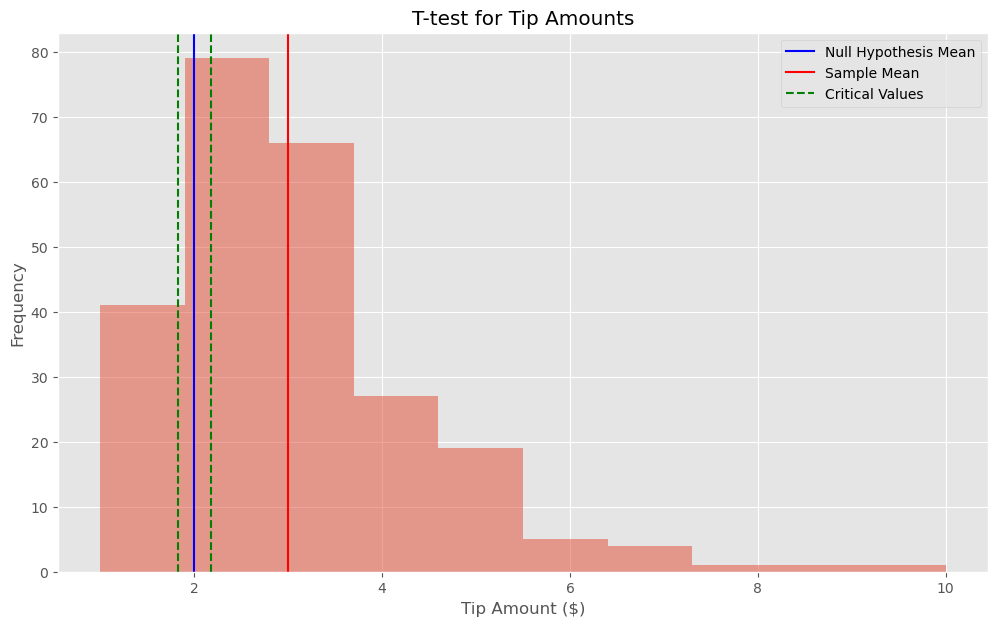

In [18]:
import seaborn as sns
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Load the tips dataset from Seaborn
tips = sns.load_dataset("tips")

# Set the significance level
alpha = 0.05

# Set the null hypothesis mean
null_mean = 2.0

# Extract the tip data
tips_data = tips['tip']

# Calculate the sample size, mean, and standard deviation
n = len(tips_data)
sample_mean = tips_data.mean()
sample_std = tips_data.std(ddof=1)

# Calculate the t-score and p-value using scipy.stats
t_score, p_value = stats.ttest_1samp(tips_data, popmean=null_mean)

# Calculate the critical values for the test
t_critical = stats.t.ppf(alpha / 2, df=n-1)
x_left = null_mean + t_critical * sample_std / np.sqrt(n)
x_right = null_mean - t_critical * sample_std / np.sqrt(n)

# Compare the p-value to the significance level and print the result
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Set the x-axis limits
x_min = 0
x_max = tips_data.max() + 1

# style and size
plt.style.use('ggplot')
plt.figure(figsize=(12,7))

# Create the histogram of tip amounts
plt.hist(tips_data, bins=10, alpha=0.5)

# Plot the null hypothesis mean and sample mean on the x-axis
plt.axvline(x=null_mean, color='b', label='Null Hypothesis Mean')
plt.axvline(x=sample_mean, color='r', label='Sample Mean')

# Plot the critical values on the x-axis
plt.axvline(x=x_left, linestyle='--', color='g', label='Critical Values')
plt.axvline(x=x_right, linestyle='--', color='g')

# Add a legend, axis labels, and a title
plt.legend()
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.title('T-test for Tip Amounts')
plt.show()

## **T-Test**

Reject the null hypothesis


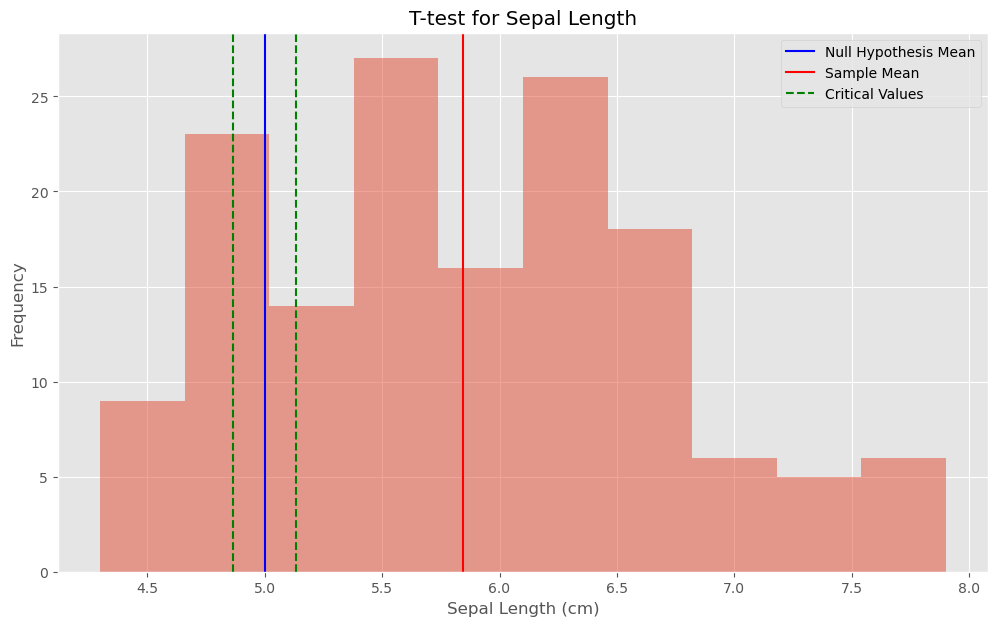

In [19]:
from sklearn.datasets import load_iris
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset from scikit-learn
iris = load_iris()

# Set the significance level
alpha = 0.05

# Set the null hypothesis mean
null_mean = 5.0

# Extract the sepal length data
sepal_length = iris.data[:, 0]

# Calculate the sample size, mean, and standard deviation
n = len(sepal_length)
sample_mean = sepal_length.mean()
sample_std = sepal_length.std(ddof=1)

# Calculate the t-score and p-value using scipy.stats
t_score, p_value = stats.ttest_1samp(sepal_length, popmean=null_mean)

# Calculate the critical values for the test
t_critical = stats.t.ppf(alpha / 2, df=n-1)
x_left = null_mean + t_critical * sample_std / np.sqrt(n)
x_right = null_mean - t_critical * sample_std / np.sqrt(n)

# Compare the p-value to the significance level and print the result
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Set the x-axis limits
x_min = 4
x_max = 8

# style and size
plt.style.use('ggplot')
plt.figure(figsize=(12,7))

# Create the histogram of sepal lengths
plt.hist(sepal_length, bins=10, alpha=0.5)

# Plot the null hypothesis mean and sample mean on the x-axis
plt.axvline(x=null_mean, color='b', label='Null Hypothesis Mean')
plt.axvline(x=sample_mean, color='r', label='Sample Mean')

# Plot the critical values on the x-axis
plt.axvline(x=x_left, linestyle='--', color='g', label='Critical Values')
plt.axvline(x=x_right, linestyle='--', color='g')

# Add a legend, axis labels, and a title
plt.legend()
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('T-test for Sepal Length')
plt.show()

## **ANOVA**

**On IRIS DataSet**

Reject the null hypothesis


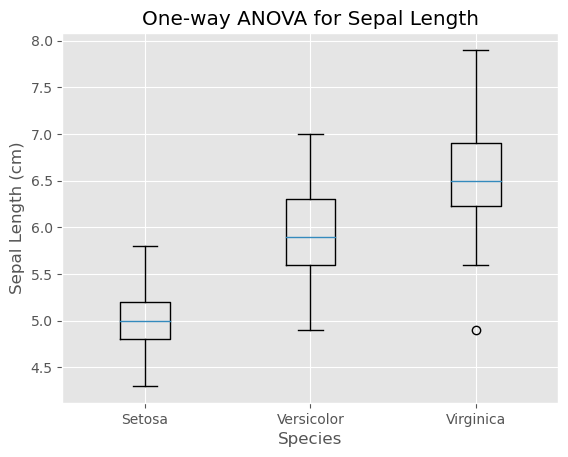

In [20]:
from sklearn.datasets import load_iris
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset from scikit-learn
iris = load_iris()

# Set the significance level
alpha = 0.05

# Extract the sepal length data for each species
setosa_sepal_length = iris.data[:50, 0]
versicolor_sepal_length = iris.data[50:100, 0]
virginica_sepal_length = iris.data[100:, 0]

# Conduct the one-way ANOVA using scipy.stats
f_value, p_value = stats.f_oneway(
    setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length)

# Calculate the degrees of freedom
df_between = 2
df_within = len(setosa_sepal_length) + \
    len(versicolor_sepal_length) + len(virginica_sepal_length) - 3

# Calculate the critical value for the F-distribution
f_critical = stats.f.ppf(1 - alpha, dfn=df_between, dfd=df_within)

# Compare the p-value to the significance level and print the result
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Create the boxplot of sepal lengths for each species
data = [setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['Setosa', 'Versicolor', 'Virginica'])
ax.set_xlabel('Species')
ax.set_ylabel('Sepal Length (cm)')
ax.set_title('One-way ANOVA for Sepal Length')
plt.show()

**On Tips DataSet**

Reject the null hypothesis


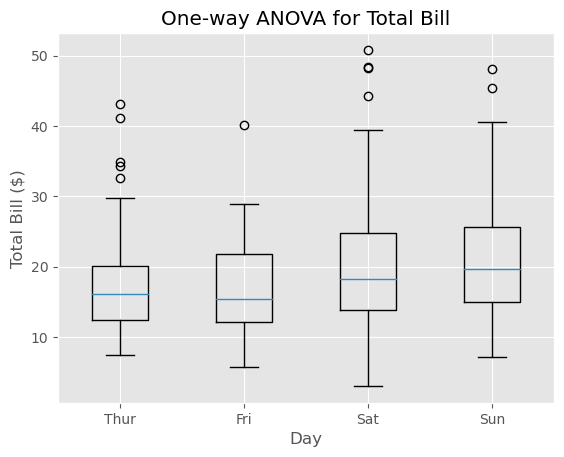

In [21]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the Tips dataset from seaborn
tips = sns.load_dataset('tips')

# Set the significance level
alpha = 0.05

# Extract the data for each group
group1 = tips[tips['day'] == 'Thur']['total_bill']
group2 = tips[tips['day'] == 'Fri']['total_bill']
group3 = tips[tips['day'] == 'Sat']['total_bill']
group4 = tips[tips['day'] == 'Sun']['total_bill']

# Conduct the one-way ANOVA using scipy.stats
f_value, p_value = stats.f_oneway(group1, group2, group3, group4)

# Calculate the degrees of freedom
df_between = 3
df_within = len(tips) - 4

# Calculate the critical value for the F-distribution
f_critical = stats.f.ppf(1 - alpha, dfn=df_between, dfd=df_within)

# Compare the p-value to the significance level and print the result
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Create the boxplot of total bill for each group
data = [group1, group2, group3, group4]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['Thur', 'Fri', 'Sat', 'Sun'])
ax.set_xlabel('Day')
ax.set_ylabel('Total Bill ($)')
ax.set_title('One-way ANOVA for Total Bill')
plt.show()

## **Chi-Square tests** 

In [22]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Create a contingency table
data = {'Male': [20, 25, 10], 'Female': [15, 20, 25]}
df = pd.DataFrame(data=data, index=['Math', 'Science', 'English'])

# Conduct the Chi-Square test using scipy.stats
chi2_stat, p_val, dof, ex = stats.chi2_contingency(df)

# Set the significance level
alpha = 0.05

# Compare the p-value to the significance level and print the result
if p_val < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

# Print the expected frequencies
print("Expected frequencies:")
print(ex)

Reject the null hypothesis
Expected frequencies:
[[16.73913043 18.26086957]
 [21.52173913 23.47826087]
 [16.73913043 18.26086957]]


**On Iris DataSet**

class         Iris-setosa  Iris-versicolor  Iris-virginica
petal_length                                              
short                  50                0               0
medium                  0               48               6
long                    0                2              44
Chi-Square test statistic: 256.52173913043475
p-value: 2.561410449304364e-54
Degrees of freedom: 4
Expected frequencies:
 [[16.66666667 16.66666667 16.66666667]
 [18.         18.         18.        ]
 [15.33333333 15.33333333 15.33333333]]


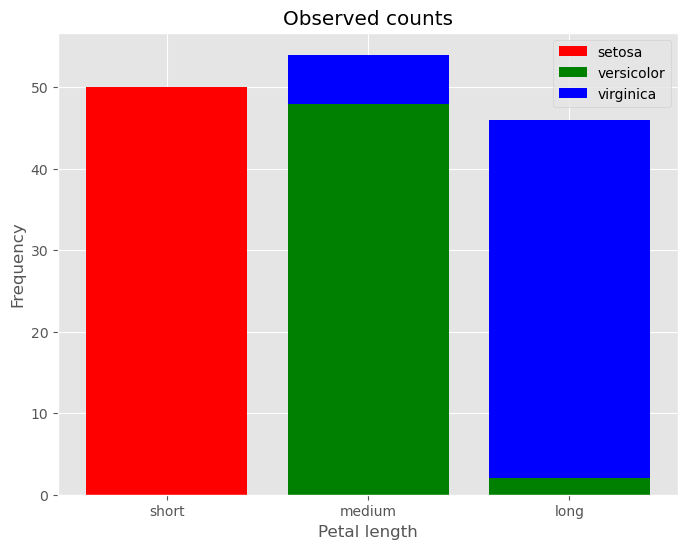

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Load the iris dataset
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Create a contingency table
petal_length_bins = pd.cut(iris['petal_length'], bins=3, labels=['short', 'medium', 'long'])
table = pd.crosstab(petal_length_bins, iris['class'])

# Print the contingency table
print(table)

# Perform the Chi-Square test
stat, p, dof, expected = chi2_contingency(table)

# Print the test statistic, p-value, and degrees of freedom
print('Chi-Square test statistic:', stat)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:\n', expected)

# Plot the observed counts
observed_counts = np.array(table)
labels = petal_length_bins.cat.categories



plt.bar(labels, observed_counts[:, 0], color='r', label='setosa')
plt.bar(labels, observed_counts[:, 1], bottom=observed_counts[:, 0], color='g', label='versicolor')
plt.bar(labels, observed_counts[:, 2], bottom=observed_counts[:, 0]+observed_counts[:, 1], color='b', label='virginica')
plt.xlabel('Petal length')
plt.ylabel('Frequency')
plt.title('Observed counts')
plt.legend()
plt.show()


Feature 'sepal length (cm)'
	Chi2 statistic: 10.817820878494011
	P-value: 0.004476514990225747

Feature 'sepal width (cm)'
	Chi2 statistic: 3.7107283035324916
	P-value: 0.1563959804316255

Feature 'petal length (cm)'
	Chi2 statistic: 116.31261309207008
	P-value: 5.533972277194346e-26

Feature 'petal width (cm)'
	Chi2 statistic: 67.04836020011112
	P-value: 2.758249653003473e-15



<AxesSubplot:>

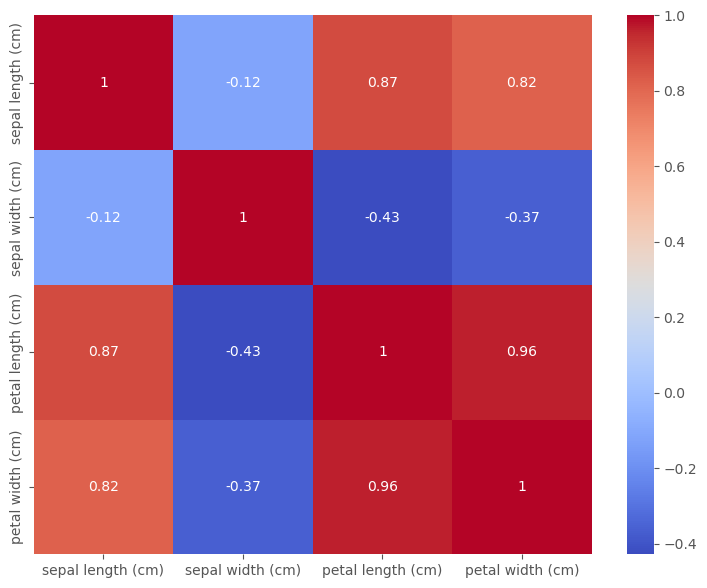

In [36]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert the target variable to categorical values
le = LabelEncoder()
y = le.fit_transform(y)

# Use chi-square test to get the chi2 statistics and p-values for each feature
chi2_stat, p_values = chi2(X, y)

# Print the results
for i in range(len(iris.feature_names)):
    print(f"Feature '{iris.feature_names[i]}'")
    print(f"\tChi2 statistic: {chi2_stat[i]}")
    print(f"\tP-value: {p_values[i]}\n")


# Convert X to a Pandas DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)

# style and size
plt.style.use('ggplot')
plt.figure(figsize=(9, 7))

# Calculate the correlation matrix and plot it as a heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
